In [86]:
from numpy.random import normal
import numpy as np
from numpy.linalg import inv

from scipy import *
from scipy.linalg import norm, pinv
 

from sympy import symbols, diff
import matplotlib.pyplot as plt



In [87]:
np.random.seed(0)

def radialbasisfunc(beta, c, d):
    return exp(-beta * norm(c-d)**2)
     
def activation(X, beta, numNeurons, centers):
    # calculate activations of RBFs
    G = zeros((X.shape[0], numNeurons), float)
    for ci, c in enumerate(centers):
        for xi, x in enumerate(X):
            G[xi,ci] = radialbasisfunc(beta, c, x)
    return G
     
def trainrbf(X, Y, beta, numNeurons):
    """ X: matrix of dimensions n x indim 
        y: column vector of dimension n x 1 """
         
    # choose random center vectors from training set
    
    #We permute randomly the centers indices
    rnd_idx = random.permutation(X.shape[0])[:numNeurons]
    
    #Centers contain all points X(1:rnd_idx) play the role of neurons
    centers = [X[i,:] for i in rnd_idx]
         
    print "center", centers
    
    # calculate activations of RBFs
    G = activation(X, beta, numNeurons, centers)
    print G
         
    # calculate output weights (pseudoinverse)
    W = dot(pinv(G), Y)
    
    L = [W, centers]
    
    return L
         
def testrbf(X, W, beta, numNeurons, centers):
    """ X: matrix of dimensions n x indim """
         
    G = _activation(X, beta, numNeurons, centers)
    Y = dot(G, W)
    return Y



center [array([-3.63727455]), array([ 3.11623246]), array([ 1.13226453]), array([-0.0501002]), array([-3.43687375]), array([ 4.75951904]), array([-2.31462926]), array([ 1.21242485]), array([-4.61923848]), array([-3.15631263]), array([-0.99198397]), array([ 2.53507014]), array([-3.09619238]), array([-3.19639279]), array([-1.85370741]), array([-2.51503006]), array([-2.35470942]), array([-0.33066132]), array([ 2.59519038]), array([-0.3507014]), array([ 2.9759519]), array([-3.93787575]), array([ 2.41482966]), array([-1.41282565]), array([ 0.09018036]), array([ 4.33867735]), array([-0.23046092]), array([ 0.63126253]), array([-4.07815631]), array([ 2.91583166])]
[[  9.27963480e-005   9.08029124e-144   2.20039382e-082 ...,
    1.38096604e-069   1.42788063e-002   8.60379280e-137]
 [  1.21691668e-004   4.60900797e-143   7.50477179e-082 ...,
    4.26006657e-069   1.71415707e-002   4.19523360e-136]
 [  1.58944921e-004   2.33008086e-142   2.54935559e-081 ...,
    1.30889745e-068   2.04958144e-002 

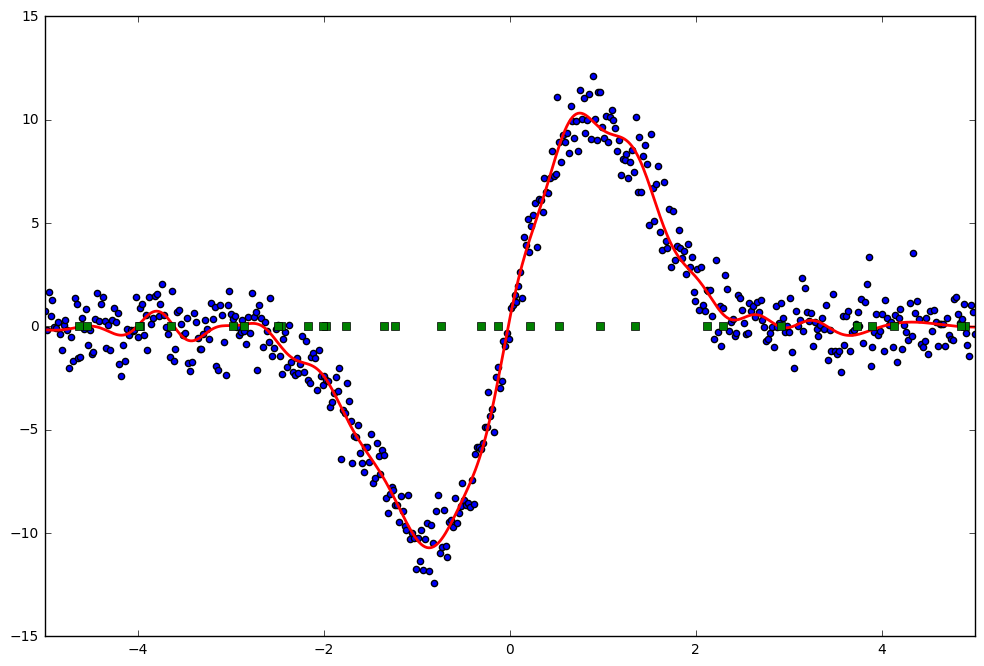

In [90]:
n = 500
     
#Define the bound of the focused interval    
lbound = -5
ubound = 5
    
x = mgrid[lbound:ubound:complex(0,n)].reshape(n, 1)
# set y and add random noise
    
y = 0.01*x+20*np.sin(x)*np.exp(-x**2/2)
y += random.normal(0, 1, y.shape)
     
#Initialize parameters of the radial basis function

#Specify Dimension of inputs and outputs
InputDimension = 1
OutputDimension = 1
    
#Number of Gaussian centers
numNeurons = 30
    
#Choose the centers randomly between -1 and 1
centers = [random.uniform(lbound, ubound, InputDimension) for i in range(numNeurons)]

#Define the size of the kernels 
beta = 5

#Define the initial weights between 0 and 1 for each center
W = random.random((numNeurons, OutputDimension))


######### Start RBF regression #############

#Train the neural network on the data x
L = trainrbf(x, y , beta, numNeurons)
z = testrbf(x, L[0], beta, numNeurons, L[1])
       
# plot original data
plt.figure(figsize=(12, 8))

for i in range(n):
    plt.scatter(x[i], y[i])
     
# plot learned model
plt.plot(x, z, 'r-', linewidth=2)
     
# plot rbfs
plt.plot(centers, zeros(numNeurons), 'gs')
     
#for c in centers:
# RF prediction lines
    #Plot the interpolated line which corresponds to the mixture of gaussian lines
    #cx = arange(c-0.5, c+0.5, 0.01)
    #cy = [_radialbasisfunc(beta, array([cx_]), array([c])) for cx_ in cx]
    #plt.plot(cx, cy, '-', color='gray', linewidth=0.2)
     
plt.xlim(-5, 5)
plt.show()